<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 5 - Funciones de transformación no-lineales, manipulación del histograma.


<ul>
<li>El histograma y sus propiedades</li>
<li>Funciones de transformación no-lineales</li>
<li>Corrección gamma</li>
<li>Manipulación del histograma: estiramiento, ecualización, CLAHE, matching</li>

</ul>

<img src="res/pipeline.png"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

Se resaltan ciertas características de la imagen (bordes, contraste, …) y se ocultan o eliminan otras  (por ejemplo, el ruido)

El preprocesamiento es una etapa previa que es necesaria para otras fases posteriores del proceso de visión artificial (segmentación, extracción de características, reconocimiento e interpretación).


<img src="res/prepro.png">

En esta ocasión nos centraremos en las operaciones de transformación no-lineales y en la manipulación del histograma.



<hr>

## RECORDEMOS: Histograma de una imagen
<ul>
    <li>El histograma de una imagen presenta la frecuencia de ocurrencia de los niveles de gris en la imagen, es decir, determina la distribución de frecuencias de los niveles de gris en la imagen.</li>
    <br>
    <li>Son un elemento importante en la etapa de Pre-procesamiento pues este nos ayuda a comprender y a determinar qué transformaciones usar para mejorar la calidad de una imagen.</li>
</ul>
<br>
<center><i>Figura. Histograma de una imagen.</i></center>
<img src="res/histograma/histograma.png" alt="operaciones" style="height:300px"></img>
<br>
Un Ejemplo Simple …. Se trata de una imagen en niveles de gris muy simple, de 8x8 píxeles de tamaño. Sólo son posibles 4 niveles de gris, porque se van a usar 2 bits para codificar el nivel de intensidad de cada píxel. De la forma  habitual,  los  niveles  de  gris  se  numeran  del  0  al  3,  correspondiendo  un  brillo mayor a los valores más altos.
<br>
<center><i>Figura. ¿Cuál es el algoritmo para calcular el histograma?.</i></center>
<img src="res/histograma/histograma_2.png" alt="operaciones" style="height:200px"></img>
<br>

Los histogramas (en su caso normalizado) se definen como la probabilidad de ocurrencia de un valor de gris, mediante la siguiente ecuación:
<center><h2>$P(g)=\frac{N(g)}{M}$</h2></center>
<br>
Donde N(g) es un contador de pixeles cuyo valor es g y M es el numero total de pixeles de la imagen.
<br>
<ul>

<li>Los histogramas son una herramienta para el análisis de imágenes que permite determinar qué tan bueno es el contraste y la iluminación de la escena en la imagen.</li>
<li>En este sentido, el histograma nos ayuda a decidir cuál es el procesamiento más adecuado para mejorar la calidad de una imagen, tanto cualitativamente (nos sugiere qué operación aplicar), como cuantitativamente (en qué cantidad aplicar la operación).</li>
<li>En principio, una buena imagen debe producir un histograma más o menos uniforme y repartido en todo el rango de valores de niveles de gris, teniendo en cuenta que:</li>
    <ul>
    <li>En la parte izquierda se acumulan los tonos más oscuros.</li>
    <li>En la derecha se acumulan los más claros.</li>
    </ul>
</ul>
<br>

# 1 Propiedades del histograma


Como vimos anteriormente, el histograma de una imagen permite identificar comportamientos asociados a la distribución de niveles de intensidad. Por ejemplo, el contraste y brillo de una imagen se pueden inferir a traves de la observación de su histograma.

<br>
Las características o propiedades estadísticas (estadística descriptiva) de un histograma, a su vez, permiten evaluar las observaciones anteriores, de forma numerica.
<br><br>
Entre las propiedades estadísticas de un histograma que son utiles para el procesamiento de la imagen, se encuentran: media, desviación estándar, asimetría, energía, entropía.
<br><br>
Estas propiedades también pueden ser utilizadas para modificar o alterar el comportamiento del histograma de una imagen, con el objetivo de mejorar la misma.
<br><br>
Adicionalmente, estas propiedades pueden ser utilizadas como descriptores de una imagen, lo cuál será de gran utilidad para la sección de extracción de características.
<br>



#### 1. Media
<br>
Es el valor medio de los niveles de gris y nos informa sobre el brillo general de la imagen. Está definida por:
<br>
<center><h2>$\bar{g}=\sum_{g=0}^{L-1}gP(g)=\sum_{i}\sum_{j}\frac{I(i,j)}{M}$</h2></center>
<br>

#### 2.  Desviación estandar
<br>
Mide la dispersión a los alredores de la media. Está definida por:
<br>
<center><h2>$\sigma^2 = \sqrt{ \sum_{g=0}^{L-1} (g-\bar{g})^2 P(g)}$</h2></center>
<br>
Una desviación estándar alta corresponde con un contraste alto y al contrario.
<br>

#### 3. Asimetría 
<br>
La asimetría (skewness) mide el sesgo de una imagen hacia la izquierda o hacia la derecha de un punto medio. Un valor absoluto alto de $A$ indica una gran asimetría.
<br>
<center><h2>$A  = \frac{\sum_{g=0}^{L-1}(g-\bar{g})^3 P(g)}{(\sigma^2)^3} = \frac{\sum_{i=1}^{M*N-1}(g_{i} - \bar{g})^{3}/(M*N)} {s^{3}}$</h2></center>

Podemos medir la asimetría de una imagen con respecto al punto medio para medir qué tan clara u oscura es la misma.

<center><h2>$A = \frac{\sum_{g=0}^{L-1}(g-127)^3 P(g)}{(\sigma^2)^3} $</h2></center>


<br>

#### 4. Energía
<br>
Nos informa sobre la distribución de los niveles de gris. Tiene un valor máximo de 1 para una imagen con un único nivel de gris y disminuye a medida que aumenta el número de niveles de gris.
<br>
<br>
<center><h2>$E = \sum_{g=0}^{L-1}(P(g))^2$</h2></center>
<br>

#### 5. Entropia
<br>
Nos informa sobre la distribución de los niveles de gris. Cuanto mayor es el nivel de gris en la imagen mayor es la entropía, esta medida tiende a variar inversamente con la energía.
<br>
<center><h2>$e = -\sum_{g=0}^{L-1}(P(g))Log_2(P(g))$</h2></center>
<br>

En todos los casos anteriores, P(g) se refiere al histograma en modo normalizado, o la probabilidad de ocurrencia de cada nivel de gris de la imagen.
<br>
<center><i>Figura. Propiedades del histograma.</i></center>
<img src="res/histograma/propiedades.png" alt="operaciones" style="height:300px"></img>
<br>
<hr>

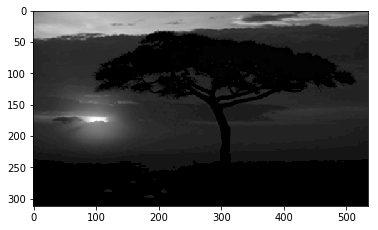

In [1]:
#Importar las librerias necesarias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Leer la imagen
img = cv2.imread('res/no_lineal/atardecer.png', cv2.IMREAD_GRAYSCALE)
#Guardar la matriz de la imagen en 1 dimensión como un vector. "Aplanarla"
img_raveled = img.ravel()
#Mostrar la imagen
plt.imshow(img, cmap='gray')

In [2]:
print(img_raveled)

[131 132 134 ...,   3   3   3]


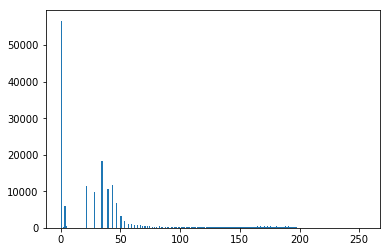

In [3]:
#Guardar los histogramas con y sin normalización
hist_orig = plt.hist(img_raveled, bins=255, range=(0.0, 255.0))
hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)

In [4]:
hist_norm[1]

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

A continuación se muestra el código que opera los histogramas normalizado y sin normalizar, para obtener los datos estadísticos descritos anteriormente.

In [5]:
#hist_norm[0] es un vector de probabilidades.
#hist_norm[1] es el vector de valores a los que corresponde cada probabilidad.


#Se calcula la media, desviación estándar, asimetría respecto a la media y al punto medio
#hist_norm[1][0:255] significa tomar del array todos los valores entre 0 y 255

#Media de los niveles de intensidad
mean =np.sum(hist_norm[0]*hist_norm[1][0:255])
print("La media de los niveles de intensidad de la imagen es", mean)

#g = hist_norm[1][0:255] & P(g) = hist_norm[0]
#Desviación estándar
std =  np.sqrt(np.sum(hist_norm[0]*(hist_norm[1][0:255]-mean)**2))
print("La desviación estándar es", std)

#Asimetría respecto a la media
skewness=(np.sum(hist_norm[0]*(hist_norm[1][0:255]-mean)**3)/(std**3))
print("La asimetría respecto a la media es", skewness)

#Asimetría respecto al punto medio
skewness_midpoint =(np.sum(hist_norm[0]*(hist_norm[1][0:255]-127)**3)/(std**3))
print("La asimetría respecto al punto medio es", skewness_midpoint)

La media de los niveles de intensidad de la imagen es 38.3076683441
La desviación estándar es 48.4667121495
La asimetría respecto a la media es 1.76738309934
La asimetría respecto al punto medio es -9.85063240258


# 2 Funciones básicas de transformación no lineal

La transformación también puede ser NO LINEAL: cuadráticas, polinomiales, exponenciales, logarítmicas, escalonadas, etc. en general, transformaciones elementales que se pueden ver como funciones f: N -> N


<br>
<center><i>Figura. Operaciones no-linales.</i></center>
<img src="res/no_lineal/no-lineal.png" alt="operaciones" style="height:300px"></img>
<img src="res/no_lineal/no-lineal2.png" alt="operaciones" style="height:350px"></img>


Los casos mostrados arriba son idealizados. Este tipo de funciones generalmente se aplican sobre valores entre 0 y 1 para controlar la exponencialidad.

*255^2 = 65025 (!!!)*

A continuación, una implementación del caso de la parábola: ax^2+bx+c

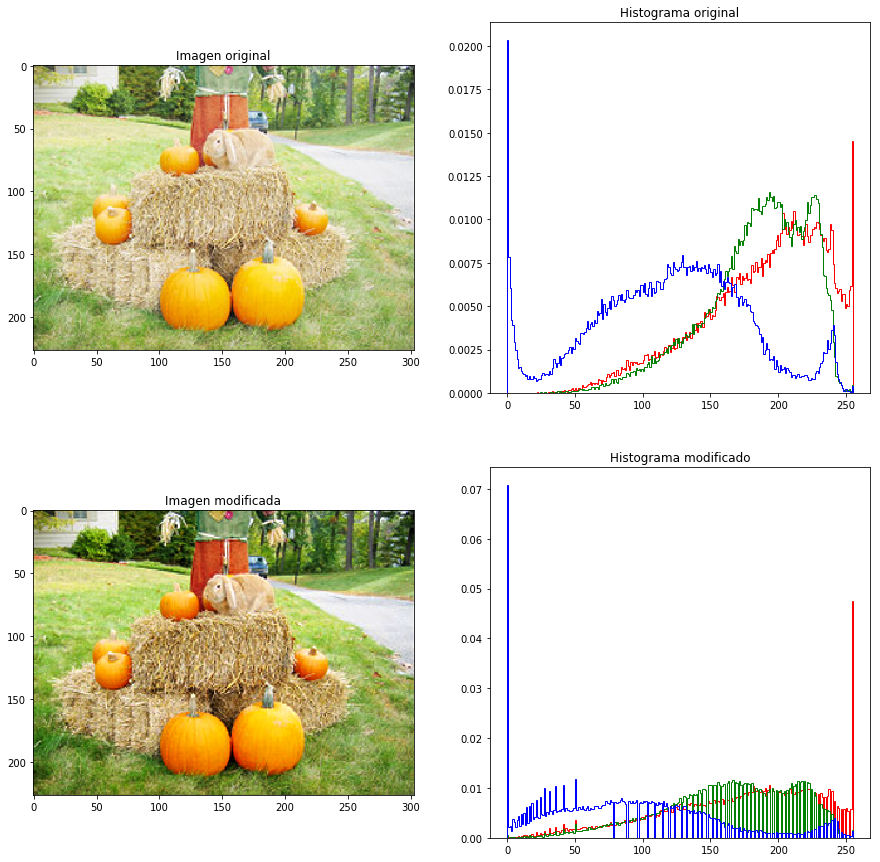

In [10]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (parábola)
def non_linear_parabola(img, a, b, c):
    
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255.0
    #Una parábola tiene la forma ax² + bx + c, donde x es la imagen de entrada
    #A partir de la imagen, generar ax²
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    #Generar bx
    res_b = cv2.multiply(img_copy,b)
    #Sumar ax² + bx + c
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res 

#Leer la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/no_lineal/calabazas.png'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,b,c (args)
a = 0.7
b = 0.4
c = -0.05

#Aplicar la transformación de la parábola sobre la imagen de entrada
res = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

Implementación de la raiz.

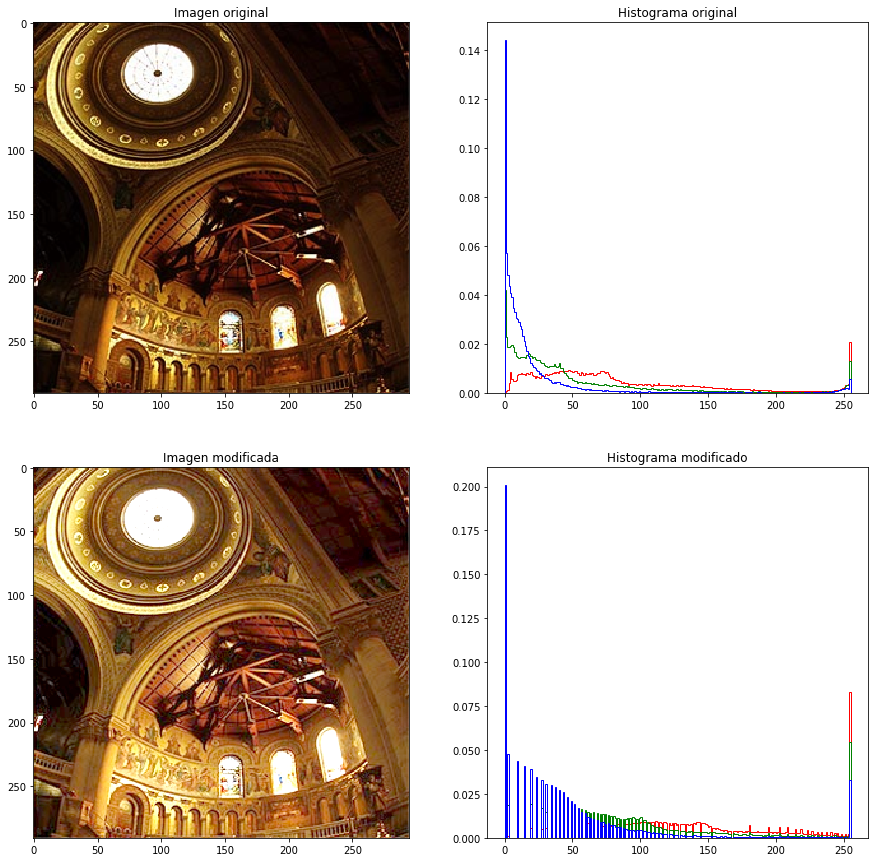

In [11]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (raíz)
def non_linear_root(img, a, b):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función raíz es de la forma ax⁰⁵ + b, donde x es la imagen de entrada
    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/no_lineal/techo.png'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,b (args)
a = 1.25
b = -0.1

#Aplicar la transformación raíz sobre la imagen de entrada 
res = apply_f_on_rgb(img, non_linear_root, [a, b])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

# 3 Corrección gamma

La corrección o transformación Gamma se usa para manipular el contraste y realzar la imagen. La ecuación general es: 
<br>
<center><h3>$f(x)= ax^\gamma$</h3></center>
<br>
Siendo gamma ($\gamma$) el exponente de la potencia de x y $a$ una constante entre 0 y 1.
<br>
<br>
<center><i>Figura. Corrección gamma para distintos valores de $\gamma$, $a$, asumiendo valores de entrada entre 0 y 1</i></center>
<img src="res/no_lineal/gamma_correction.png" alt="operaciones" style="height:325px"></img>
<br>

En el caso de que $\gamma$ < 1 se obtendrán tonos más claros.

En el caso de que $\gamma$ > 1 se obtendrán tonos más oscuros.
<br>

**<center>NOTA: Si los niveles de gris se tratan como valores reales entre 0 y 255, la descripción anterior se invierte.</center>**

__________________________


<center><i>Figura. Corrección gamma para distintos valores de $\gamma$, con $a=1$.</i></center>
<img src="res/no_lineal/gamma_1.png" alt="gamma" style="width:300px"></img>
<img src="res/no_lineal/gamma_correction_2.jpg" alt="operaciones" style="width:300px"></img>
<br>

La corrección Gamma tienes su raíces en la forma en que los humanos percibimos la luz y el color. Esta percepción es de tipo no lineal y en condiciones de iluminación normal sigue un comportamiento de potencia.
<hr>

In [10]:
#Importar librerias
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

#Dar valor a gamma y crear un vector de datos 0<x<1
gamma=0.5
steps=200

x = np.linspace(0,1.0,steps)
print(x)

[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.42713568 0.4321608  0.43718593 0.44221106 0.447236

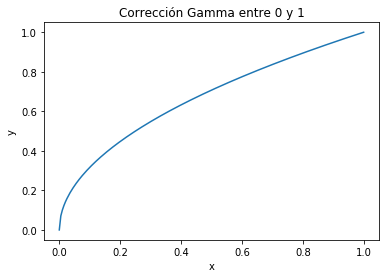

In [184]:
#Generar la transformación gamma, x^gamma
y= np.power(x,gamma)

#Crear una figura para mostrar x vs x^gamma
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Corrección Gamma entre 0 y 1")
#plt.savefig("Funcion Cuadratica")
plt.show()

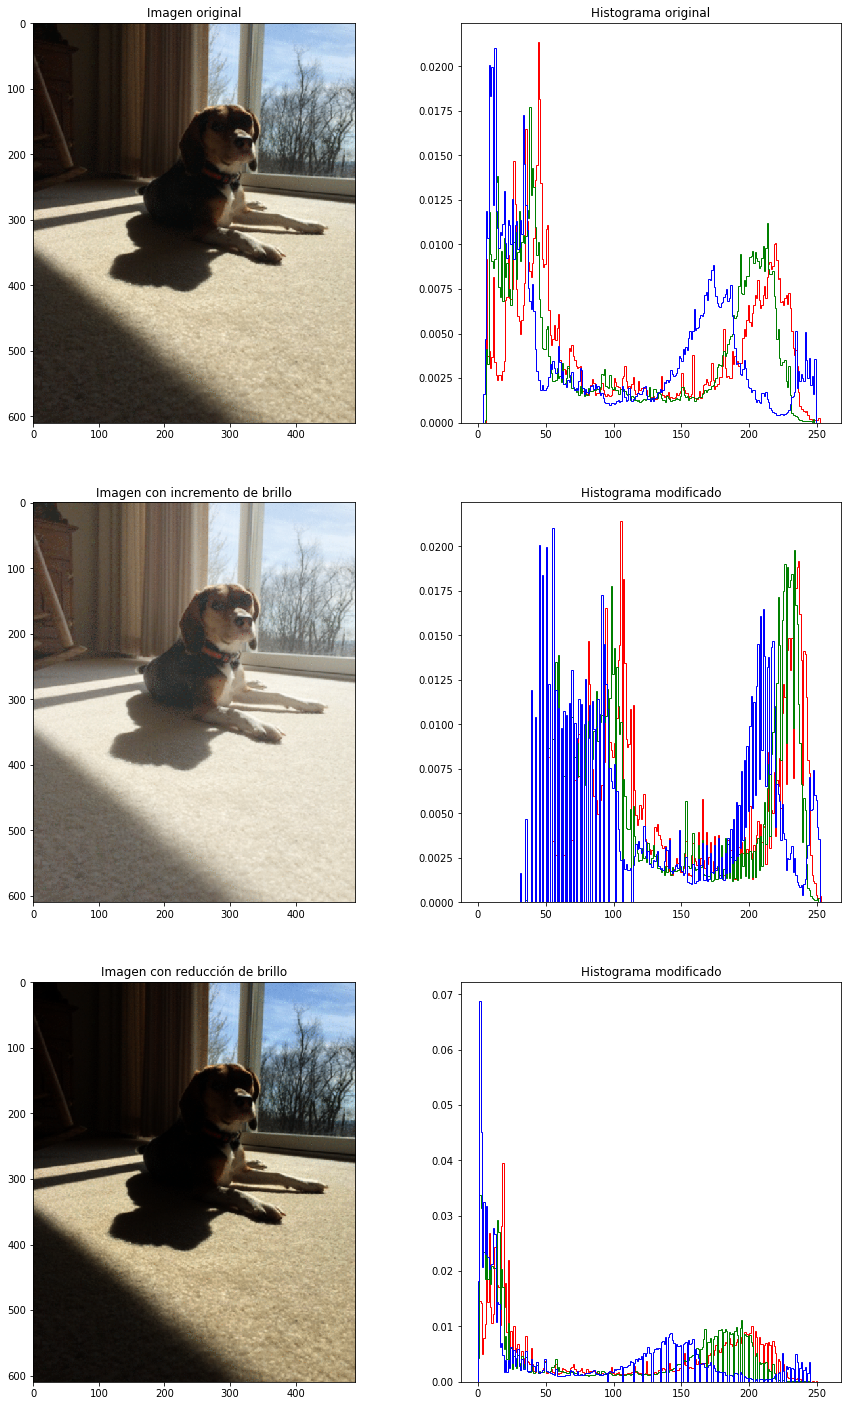

In [178]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/no_lineal/dog.png'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

## 4. Operaciones sobre el histograma

### Expansión (normalización) del histograma
<br>
Esta operación toma una imagen de entrada f y expande su histograma a lo largo de los valores completos de los niveles de gris.  Esto tiene como efecto, que incrementa el contraste de una imagen de bajo contraste. Es una técnica simple para mejorar el contraste de una imagen que “expande” el rango de niveles de intensidad que contiene la imagen a un rango de valores deseado.
<br>

Nos interesa expandir el Histograma para conseguir que aparezca todo el rango de valores en intensidad en una imagen … ¿Qué debemos hacer?:
<ul>
    <li>Encuentre el valor mínimo de nivel de gris (m)</li>
    <li>Encuentre el valor maximo de nivel de gris (M)</li>
</ul>
<br>
Con base en estos valores se define la función de expansión (normalización) como:
<br>
<center><h2>$f(g)=\frac{(g-m)*255}{(M-m)}$</h2></center>
<br>
Donde 255 es el máximo valor que puede tomar la imagen, y puede variar según la profundidad de color de la misma.
<br>
<center><i>Figura. Expansión del histograma.</i></center>
<img src="res/histograma/expansion.png" alt="expa" style="height:200px"></img>
<br>
<hr>

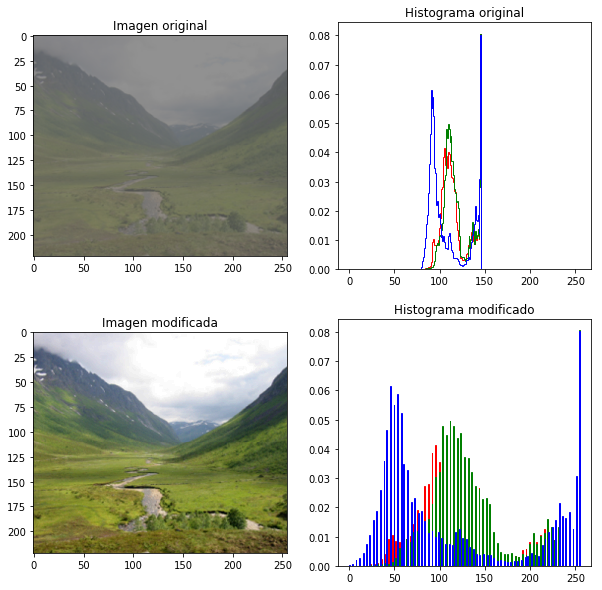

In [12]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/histograma/valle.png'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación expansión de histograma sobre la imagen de entrada
res = apply_f_on_rgb(img, histogram_expansion, [])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

En la expansión del Histograma se debe tener cuidado al seleccionar mínimo el y el máximo porque valores muy bajos o muy altos con poca frecuencia en el histograma pueden hacer que el ajuste no funcione. como se puede ver en la siguiente figura.

<center><i>Figura. Falsos máximos.</i></center>
<img src="res/histograma/false_max.png" alt="expa" style="height:400px"></img>


### Ecualización o igualación del histograma
<br>
La Ecualización del Histograma de una imagen es una transformación que pretende obtener para una imagen un histograma con una distribución uniforme. Es decir, que exista el mismo número de píxeles para cada nivel de gris.
<br><br>
Representa una de las técnicas más utilizadas para la mejora del contraste de la imagen. El objetivo es distribuir los niveles de gris de una manera uniforme a lo largo de todo el rango de valores de niveles de gris. Esta operación depende de una <b>función de densidad de probabilidad fdp</b>, las cuales generarán una u otra distribución en los niveles de grises de la imagen.
<br>
<center><i>Figura. Ecualización del histograma.</i></center>
<img src="res/histograma/ecualizacion.png" alt="operaciones" style="height:250px"></img>
<br>
La manipulación del histograma se basa en controlar la función de densidad de probabilidad de los niveles de gris a través de una función de transformación. Esta funcion de transformacion puede ser de varios tipos (por mencional algunas):
<ul>
<li>Uniforme</li>
<li>Exponencial</li>
<li>Rayleigh</li>
</ul>
<br>
<center><i>Figura. Ejemplo del histograma.</i></center>
<img src="res/histograma/ecualizacion_2.png" alt="operaciones" style="height:400px"></img>
<hr>

### Función de densidad de probabilidad (fdp / pdf)
<br>

La función de densidad de probabilidad es una función que, para cualquier valor que puede tomar una variable aleatoria, devuelve la probabilidad de que este ocurra. Es decir, se trata del histograma normalizado de la imagen.

Para poder realizar cualquier tipo de ecualización, se requiere conocer la fdp de la imagen. Definamos la fdp como:
<br>
<center><h2>$p(x)= \frac{N_x}{ N} $</h2></center>
<br>

### Función de distribución acumulada (fda / cdf)

La función de distribución acumulada representa la probabilidad de la que una variable aleatoria tome un valor menor o igual a $x$.

<center><h2>$P_x(x)=\sum_{g=0}^{x}p(g)$</h2></center>

<center><i>Figura. Función de densidad de probabilidad uniforme, con valor mínimo a y máximo b.</i></center>
<img src="res/histograma/uniform_pdf.png" alt="operaciones" style="height:250px"></img>

<center><i>Figura. Función de probabilidad acumulada uniforme,  con valor mínimo a y máximo b.</i></center>
<img src="res/histograma/uniform_cum.png" alt="operaciones" style="height:250px"></img>

Donde $p(g)$, es el histograma normalizado. <b>Si se grafica la fdp, resulta que es también el histograma acumulativo normalizado de la imagen.</b>
<hr>

### Ecualización Uniforme
<br>
Esta ecualizacion pretende que todos los niveles de grises de la imagen esten uniformemente distribuidos:
<br>
<center><h2>$F(g)= round(g_{max} - g_{min})P_g(g)+g_{min}$</h2></center>
<br>
Donde $g_{max}$ y $g_{min}$ se refieren al mayor y menor valor de la imagen respectivamente. Note que la ecuación anterior es una interpolacion lineal $y = mx+b$ sobre los valores de intensidad de la imagen, de tal forma que la fdp sea monotica y linealmente creciente. Una derivacion de esta ecuacion se puede encontrar en: <a href='https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf'>link</a>

<br>
Veamos un ejemplo:
<br>
<center><i>Figura. Practiquemos.</i></center>
<img src="res/histograma/ejemplo_ecualizacion_1.png" alt="operaciones" style="height:200px"></img>
<hr>


<center><i>Figura. El resultado es el siguiente.</i></center>
<img src="res/histograma/ejemplo_ecualizacion_2.png" alt="operaciones" style="height:250px"></img>
<hr>

### Implementemos la ecualización del histograma

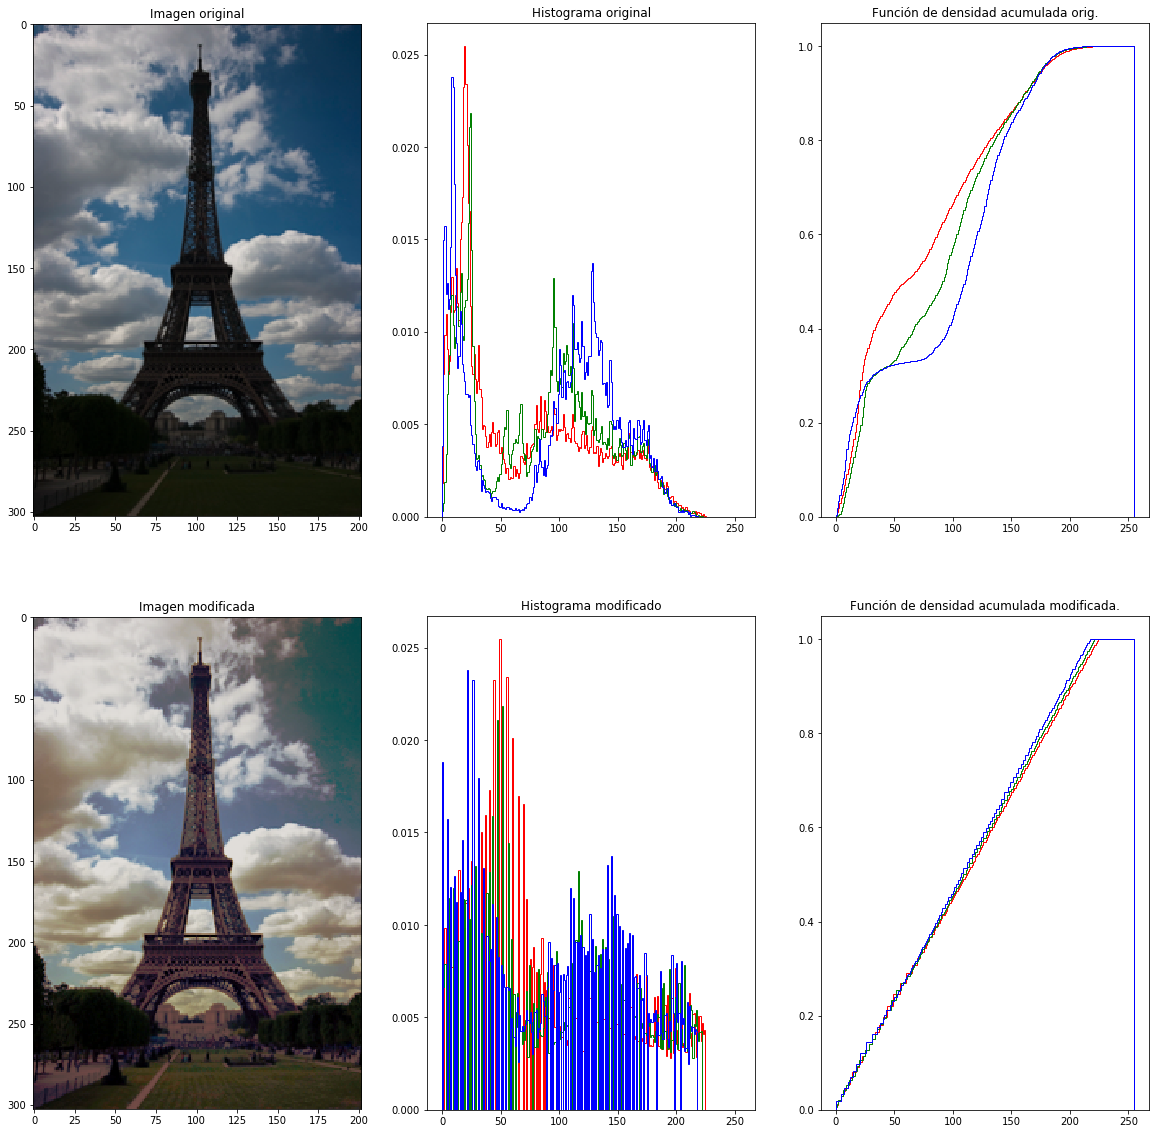

In [18]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/histograma/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


### También es posible utilizar la implementación de OpenCV, aunque esta solamente realiza ecualización uniforme:

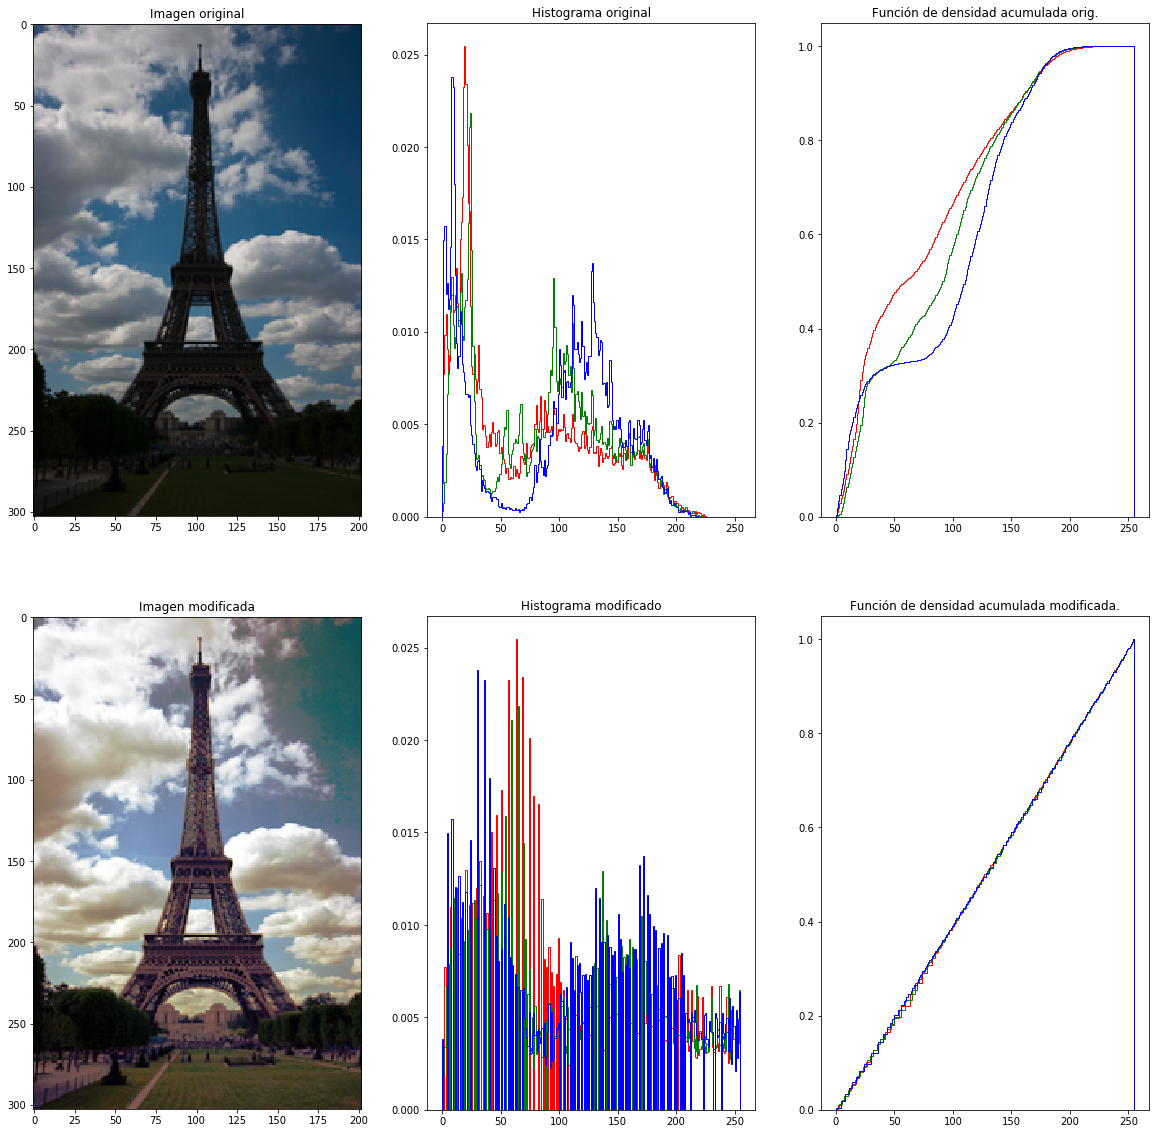

In [211]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/histograma/eiffel.png'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación de ecualización de cv2 a la imagen de entrada
res = apply_f_on_rgb(img, cv2.equalizeHist, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

### Ecualización exponencial
<br>
La ecualización exponencial viene dada por la siguiente ecuación, y depende de un parámetro $\alpha$ o $\lambda$ que define la forma deseada del histograma:
<br>
<center><h2>$F(g) = -g_{min}-\frac{1}{\alpha}ln[1-P_g(g)]*(g_{max}-g_{min})$</h2></center>
<hr>

<center><i>Figura. Función de densidad de probabilidad exponencial.</i></center>
<img src="res/histograma/exponential_pdf.png" alt="operaciones" style="height:250px"></img>

<center><i>Figura. Función de probabilidad acumulada exponencial.</i></center>
<img src="res/histograma/exponential_cum.png" alt="operaciones" style="height:250px"></img>

### Ecualización rayleigh
<br>
La ecualización rayleigh es muy útil para procesar imágenes subacuáticas. Viene dada por la siguiente ecuación, y depende de un parámetro $\alpha$ o $\sigma$ que define la forma deseada del histograma:

<center><h2>$F(g) = g_{min} + \sqrt{ -2\alpha^2ln[1-P_g(g)] }  * (g_{max} - g_{min}) $</h2></center>
<hr>

<center><i>Figura. Función de densidad de probabilidad rayleigh.</i></center>
<img src="res/histograma/rayleigh_pdf.png" alt="operaciones" style="height:250px"></img>

<center><i>Figura. Función de probabilidad acumulada rayleigh.</i></center>
<img src="res/histograma/rayleigh_cdf.png" alt="operaciones" style="height:250px"></img>

## Ecualización del Histograma Adaptativa con Contraste Limitado (CLAHE)

Si bien el incremento del contraste que resulta de la ecualización del histograma es notorio, a menudo resulta en mapeos erróneos para algunos colores, en una amplificación indeseada del ruido y en la aparición de artefactos. 


El algoritmo CLAHE soluciona estos problemas combinando dos técnicas, la Ecualización de Histograma Adaptativa (AHE) y la Ecualización de Histograma con Contraste Limitado (CLHE). El principio detrás de
AHE es dividir la imagen en un número de casillas e incrementar el contraste en cada vecindario
individualmente para lograr la mejoría del mismo a nivel local en lugar de global. Una vez aplicado el método, la imagen se reconstruye mediante interpolación. En CLHE se establece un parámetro para limitar el incremento del contraste, el cual recorta píxeles de los puntos más altos del histograma y los redistribuye equitativamente en todo el histograma. Usualmente, esto implica que la zona recortada vuelva a
superar el límite establecido, por lo que el proceso se repite hasta que la zona por encima del
límite no sea apreciable.

<center><i>Figura. Redistribución de valores.</i></center>
<img src="res/histograma/clip.png" style="height:200px">

OpenCV tiene una implementación del algoritmo CLAHE, que depende de dos parámetros: 

- El límite de corte, que generalmente se mantiene en 2 para imágenes de 8bits. Entre más alto es el límite de corte, más artefactos pueden aparecer, pero si se disminuye mucho es posible que no se mejore lo suficiente el contraste. 

- La cantidad de vecindarios para los cuáles se aplica el algoritmo. Un grid size de (8,8) indica que se calculan 64 vecindarios distribuidos como 8 filas y 8 columnas.



C:\Users\Alberto\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


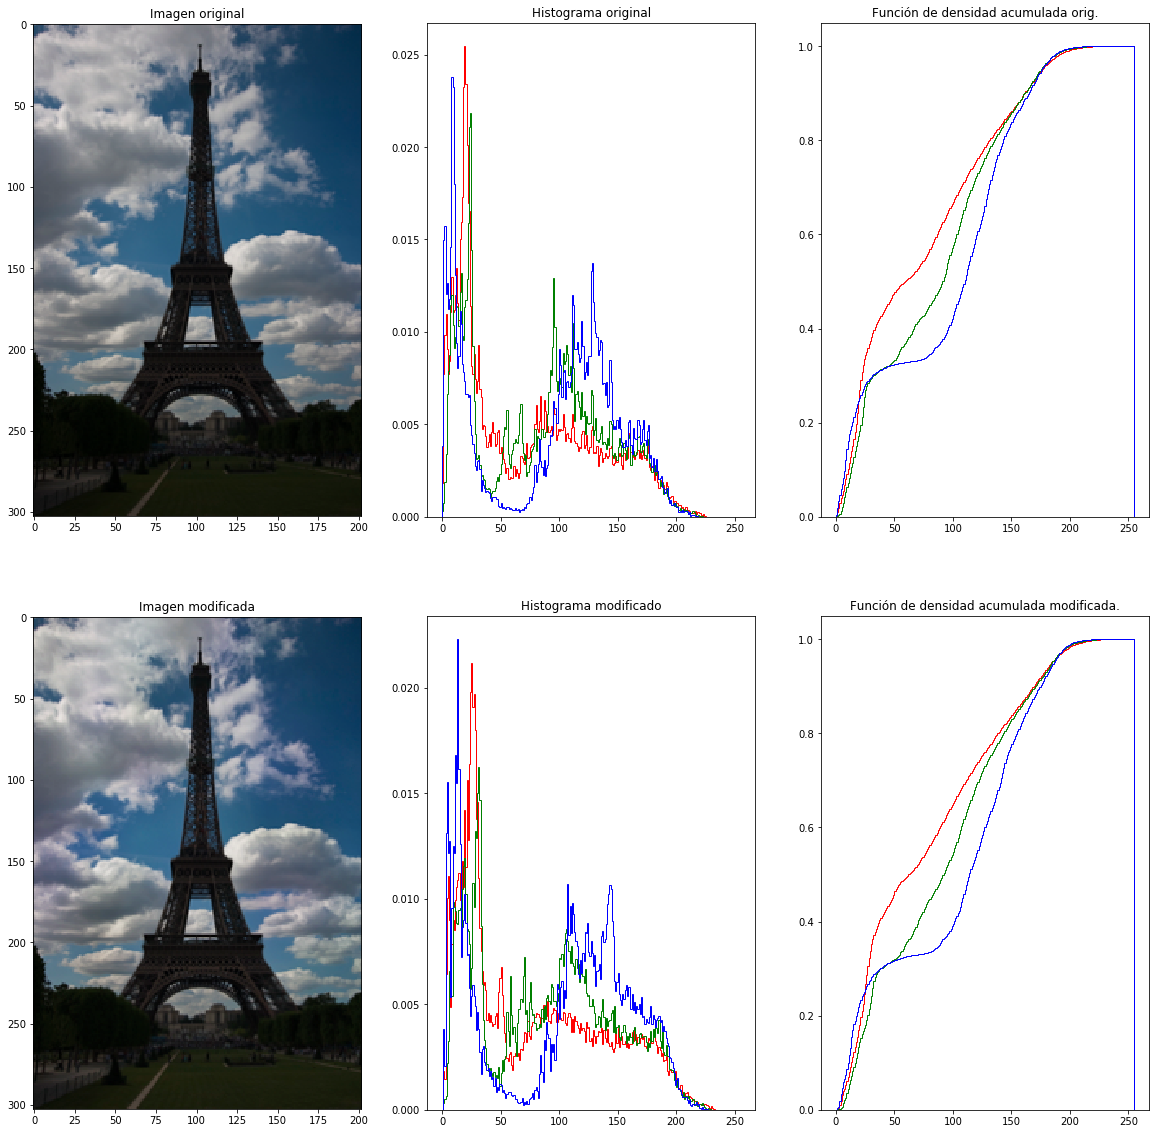

In [12]:
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/histograma/eiffel.png'), cv2.COLOR_BGR2RGB)

#Aplicar la ecualización CLAHE a la imagen de entrada
clahe = cv2.createCLAHE(clipLimit=0.01, tileGridSize=(8,8))
res = apply_f_on_rgb(img, clahe.apply, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

## Histogram Matching

En procesamiento de imágenes, histogram matching o especificación de histograma es la transformación de una imagen de forma que su histograma se ajuste a otro. La ecualización uniforme del histograma es un caso especial en el cual el histograma especificado está distribuido uniformemente.

Es posible hacer uso de histogram matching para balancear las respuestas de sensores. Puede ser usado, así, para normalizar dos imágenes, cuando se adquieren bajo la misma iluminación local (sombras por ej.), en el mismo lugar, pero con distintos sensores, condiciones atmosféricas  o iluminaciónes globales.

<center><i>Figura. Histogram matching.</i></center>
<img src="res/histograma/matching.png" style="height:400px">

<center><i>Figura. Ejemplo de histogram matching.</i></center>
<img src="res/histograma/matching2.png" style="height:400px">


La mayoría de las implementaciones de histogram matching, como la que veremos a continuación, hacen un ajuste aproximado del histograma. Las metodologías para ajuste exacto son diversas pero quedan por fuera del alcance del curso.



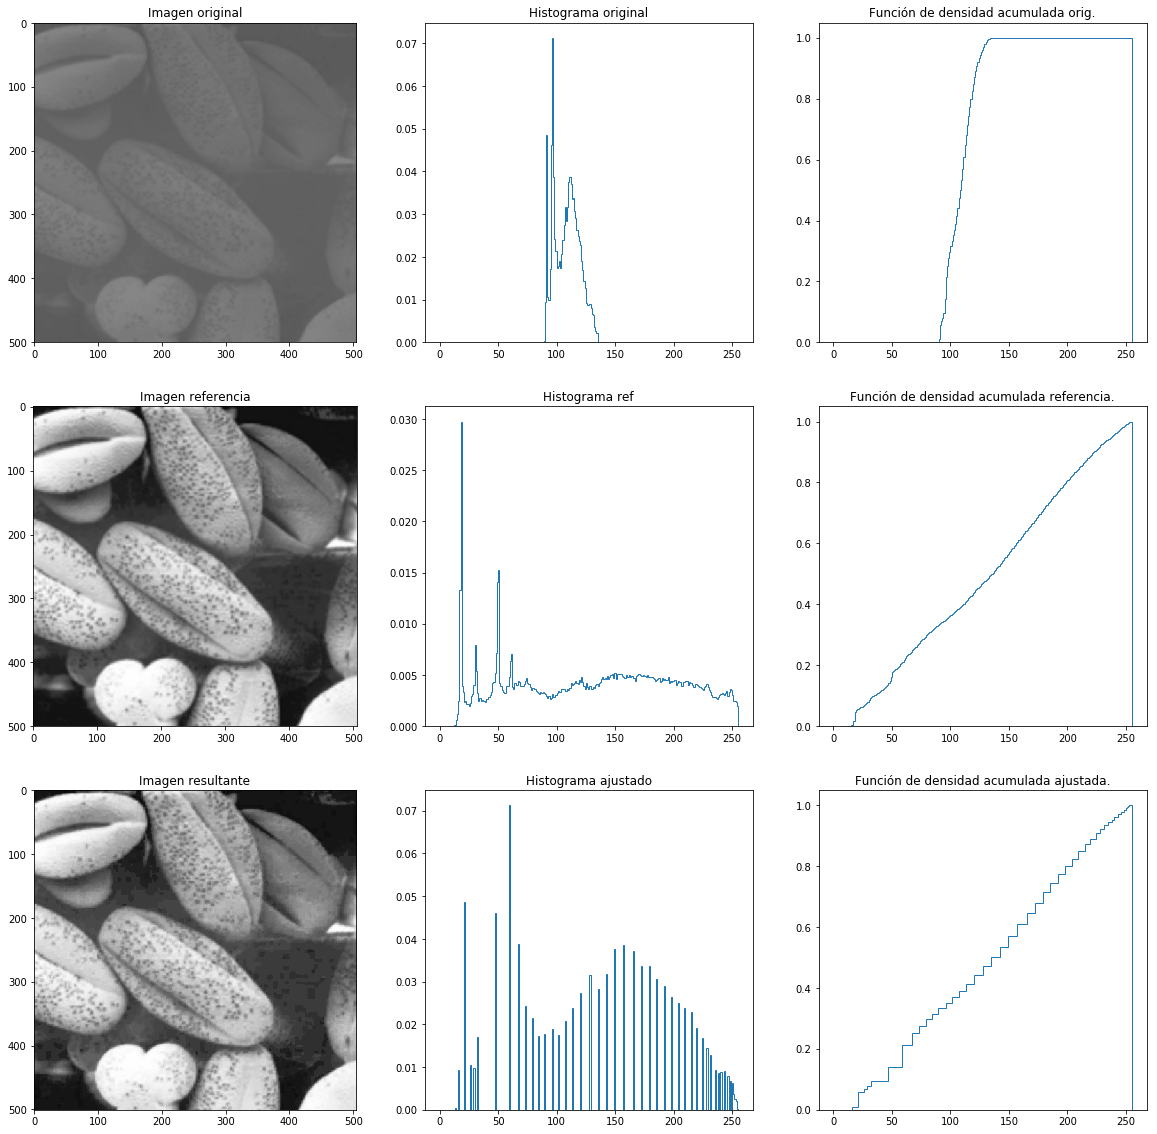

In [2]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

def hist_match(source, template):
    """
    https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x
    
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
        
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

#Leer imagen de entrada y referencia(ideal)
img = cv2.imread('res/histograma/granos.jpg', cv2.IMREAD_GRAYSCALE)
ref = cv2.imread('res/histograma/granos_ideal.png', cv2.IMREAD_GRAYSCALE)

#Aplicar el histogram matching sobre la imagen y la referencia
res = hist_match(img, ref);

#Generar el subplot 3x3 para mostrar imagen, histograma y función de densidad de probabilidad
fig, arreglo_plots = plt.subplots(3,3, figsize=(20, 20))


arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray", vmin=0, vmax=255)
arreglo_plots[0,1].set_title('Histograma original')
img_array = img[:,:].ravel()
arreglo_plots[0,1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True)

arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
img_array = img[:,:].ravel()
arreglo_plots[0,2].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, cumulative = True)


arreglo_plots[1,0].set_title('Imagen referencia')
arreglo_plots[1,0].imshow(ref, cmap="gray",vmin=0, vmax=255)
arreglo_plots[1,1].set_title('Histograma ref')
img_array = ref[:,:].ravel()
arreglo_plots[1,1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True)

arreglo_plots[1,2].set_title('Función de densidad acumulada referencia.')  
img_array = ref[:,:].ravel()
arreglo_plots[1,2].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, cumulative = True);

arreglo_plots[2,0].set_title('Imagen resultante')
arreglo_plots[2,0].imshow(res, cmap="gray",vmin=0, vmax=255)
arreglo_plots[2,1].set_title('Histograma ajustado')
img_array = res[:,:].ravel()
arreglo_plots[2,1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True)

arreglo_plots[2,2].set_title('Función de densidad acumulada ajustada.')  
img_array = res[:,:].ravel()
arreglo_plots[2,2].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, cumulative = True);
